# Generating Defect Corpus

In [1]:
import pandas as pd
import csv

df = pd.read_csv('./Annotations/SewerML_Train.csv')

Labels = ["RB","OB","PF","DE","FS","IS","RO","IN","AF","BE","FO","GR","PH","PB","OS","OP","OK"]
file = 'TrainEmbeddings.txt'

# Generating Corpus files
with open(file, 'a+') as f:
    for index, row in df.iterrows():
        flag = 0
        first = 0
        first_word = ''
        count = 0
        for j in range(17):
            if(row[Labels[j]] == 1):
                # count += 1
                # if(first == 0):
                #    first_word = Labels[j]
                #    first = 1
                f.write(Labels[j]+ ' ')
                flag = 1
        if(flag):
            if(count > 1):
                f.write(first_word+'\n')
            else:
                f.write('\n')


In [25]:
import torch.nn as nn
import torch

gt = torch.eye(17)

for i in range(17):
    Labels[i] = gt[i]
    print(Labels[i])

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
with open('./TrainEmbeddings.txt') as f:
    for line in f.readlines():
        if(line != '\n'):
            columns = line.strip().split(',')
            for i in columns:
                print(i + ' ')

In [80]:
Labels = ["RB","OB","PF","DE","FS","IS","RO","IN","AF","BE","FO","GR","PH","PB","OS","OP","OK"]
gt = torch.eye(17)
Labels_dict = dict()
for i in range(17):
    Labels_dict[Labels[i]] = gt[i]
Labels_dict['OB']

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Embedding Layer

In [3]:
from gensim.models import Word2Vec

model = Word2Vec(corpus_file='./TrainEmbeddings.txt', vector_size=17, window=2, min_count=1, workers=4)
word2vec = model.wv["RB","OB","PF","DE","FS","IS","RO","IN","AF","BE","FO","GR","PH","PB","OS","OP","OK"]

vector = model.wv['RO']  # get numpy vector of a word

sims = model.wv.most_similar('GR', topn=3)  # get other similar words
#GR PH IS RO
sims

[('IS', 0.9235206842422485),
 ('PH', 0.7863043546676636),
 ('RO', 0.7448086738586426)]

# t-SNE Visualization

[[ 55.311985    8.304182 ]
 [-32.74598    48.900238 ]
 [-63.794453  -14.726625 ]
 [-65.83676   -73.101906 ]
 [-12.401024  -58.352512 ]
 [ -2.4681337  31.753157 ]
 [ 24.094585   12.350229 ]
 [ 53.958004   45.85207  ]
 [ 13.201997  -25.66304  ]
 [ 54.0965    -36.02133  ]
 [-23.00954     1.8022405]
 [ 17.067352   34.33485  ]
 [  9.736525   62.74321  ]
 [-13.936595  -26.460644 ]
 [-67.74291   -45.294537 ]
 [-90.49188   -44.291943 ]
 [ 11.331067   90.63498  ]]


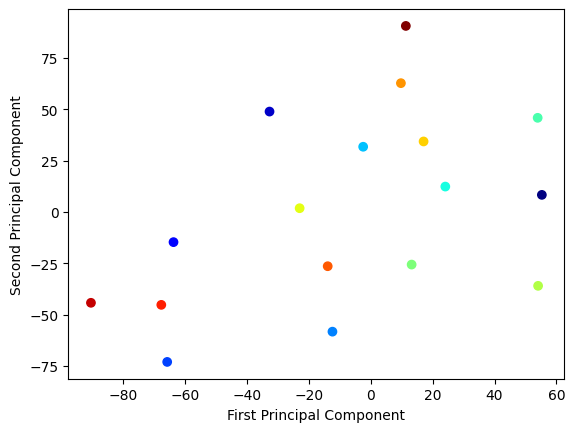

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler 

diag = np.identity(17)
 
target = np.arange(17)  
X_std = StandardScaler().fit_transform(word2vec) 
t_sne_features = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=5, random_state=2023).fit_transform(X_std)
print(t_sne_features)
plt.scatter(x=t_sne_features[:, 0], y=t_sne_features[:, 1], c = target, cmap='jet')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

